In [1]:
import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


In [2]:
#Summary of a model that returns a 2D Tensor (batch_sizes, output_features)
#This model only returns the last output for each input sequence
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
#Summary of a model that returns a 3D Tensor (batch_sizes, timesteps, output_features)
#Returns the full sequence of succesive outputs for each timestep
#This is used in every intermediate layer, when stacking several recurrent layers on top of each other
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
#Now we use a RNN for our movie review classification
#First preprocess the data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
#Train a simple RNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s - loss: 0.6394 - acc: 0.6251 - val_loss: 0.4768 - val_acc: 0.8066
Epoch 2/10
20000/20000 [==============================] - 21s - loss: 0.4223 - acc: 0.8210 - val_loss: 0.3856 - val_acc: 0.8404
Epoch 3/10
20000/20000 [==============================] - 19s - loss: 0.3044 - acc: 0.8771 - val_loss: 0.4586 - val_acc: 0.7992
Epoch 4/10
20000/20000 [==============================] - 19s - loss: 0.2296 - acc: 0.9123 - val_loss: 0.4651 - val_acc: 0.8084
Epoch 5/10
20000/20000 [==============================] - 19s - loss: 0.1744 - acc: 0.9356 - val_loss: 0.4006 - val_acc: 0.8378
Epoch 6/10
20000/20000 [==============================] - 19s - loss: 0.1163 - acc: 0.9601 - val_loss: 0.5121 - val_acc: 0.8180
Epoch 7/10
20000/20000 [==============================] - 19s - loss: 0.0751 - acc: 0.9759 - val_loss: 0.5819 - val_acc: 0.7938
Epoch 8

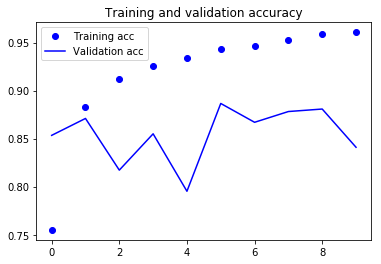

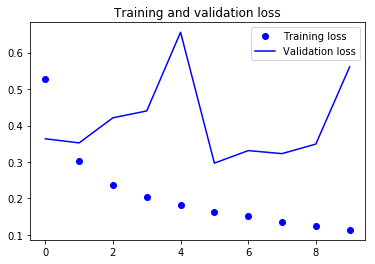

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#Using LSTM layer
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 79s - loss: 0.5279 - acc: 0.7550 - val_loss: 0.3637 - val_acc: 0.8534
Epoch 2/10
20000/20000 [==============================] - 78s - loss: 0.3032 - acc: 0.8827 - val_loss: 0.3525 - val_acc: 0.8710
Epoch 3/10
20000/20000 [==============================] - 79s - loss: 0.2379 - acc: 0.9123 - val_loss: 0.4213 - val_acc: 0.8172
Epoch 4/10
20000/20000 [==============================] - 86s - loss: 0.2047 - acc: 0.9254 - val_loss: 0.4402 - val_acc: 0.8550
Epoch 5/10
20000/20000 [==============================] - 88s - loss: 0.1820 - acc: 0.9338 - val_loss: 0.6560 - val_acc: 0.7952
Epoch 6/10
20000/20000 [==============================] - 86s - loss: 0.1626 - acc: 0.9430 - val_loss: 0.2969 - val_acc: 0.8866
Epoch 7/10
20000/20000 [==============================] - 87s - loss: 0.1518 - acc: 0.9465 - val_loss: 0.3313 - val_acc: 0.8670
Epoch 8/10
20000/20000 [==============================]

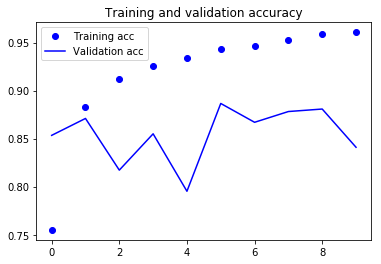

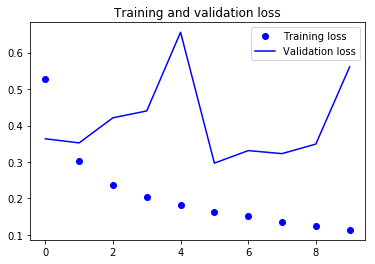

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()